StackOverflow Survey Download Page - https://insights.stackoverflow.com/survey
Datetime Formatting Codes - https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
Pandas Date Offset Codes - https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('ETH-USD.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-29,198.465195,218.454636,198.124512,216.968231,216.968231,2.639755e+10
1,2020-04-30,216.909134,227.529694,206.436920,207.602051,207.602051,2.808919e+10
2,2020-05-01,207.901733,217.628021,207.780884,214.219101,214.219101,2.081632e+10
3,2020-05-02,214.230087,215.847534,212.878677,215.325378,215.325378,1.826088e+10
4,2020-05-03,215.352066,219.270874,208.692368,210.933151,210.933151,2.046903e+10
...,...,...,...,...,...,...,...
361,2021-04-25,2214.413818,2354.086670,2172.515137,2316.059570,2316.059570,3.181436e+10
362,2021-04-26,2319.478027,2536.337402,2308.315186,2534.481689,2534.481689,3.520833e+10
363,2021-04-27,2534.031250,2676.392822,2485.375000,2662.865234,2662.865234,3.227597e+10
364,2021-04-28,2664.685547,2757.477295,2564.081543,2746.380127,2746.380127,3.426903e+10


In [3]:
d_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
df = pd.read_csv('ETH-USD.csv', parse_dates=['Date'], date_parser=d_parser)

<ipython-input-3-365cc3f400f9>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  d_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')


In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-29,198.465195,218.454636,198.124512,216.968231,216.968231,2.639755e+10
1,2020-04-30,216.909134,227.529694,206.436920,207.602051,207.602051,2.808919e+10
2,2020-05-01,207.901733,217.628021,207.780884,214.219101,214.219101,2.081632e+10
3,2020-05-02,214.230087,215.847534,212.878677,215.325378,215.325378,1.826088e+10
4,2020-05-03,215.352066,219.270874,208.692368,210.933151,210.933151,2.046903e+10


In [5]:
df.loc[0, 'Date'].day_name()

'Wednesday'

In [6]:
df['DaysOfWeek'] = df['Date'].dt.day_name()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,DaysOfWeek
0,2020-04-29,198.465195,218.454636,198.124512,216.968231,216.968231,2.639755e+10,Wednesday
1,2020-04-30,216.909134,227.529694,206.436920,207.602051,207.602051,2.808919e+10,Thursday
2,2020-05-01,207.901733,217.628021,207.780884,214.219101,214.219101,2.081632e+10,Friday
3,2020-05-02,214.230087,215.847534,212.878677,215.325378,215.325378,1.826088e+10,Saturday
4,2020-05-03,215.352066,219.270874,208.692368,210.933151,210.933151,2.046903e+10,Sunday


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        366 non-null    datetime64[ns]
 1   Open        363 non-null    float64       
 2   High        363 non-null    float64       
 3   Low         363 non-null    float64       
 4   Close       363 non-null    float64       
 5   Adj Close   363 non-null    float64       
 6   Volume      363 non-null    float64       
 7   DaysOfWeek  366 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 23.0+ KB


In [8]:
df['Date'].min()

Timestamp('2020-04-29 00:00:00')

In [9]:
df['Date'].max()

Timestamp('2021-04-29 00:00:00')

In [10]:
df['Date'].max() - df['Date'].min()

Timedelta('365 days 00:00:00')

In [11]:
filt = (df['Date'] >= pd.to_datetime('2020-04-29')) & (df['Date'] < pd.to_datetime('2021-01-01'))
df.loc[filt]

,Date,Open,High,Low,Close,Adj Close,Volume,DaysOfWeek
0,2020-04-29,198.465195,218.454636,198.124512,216.968231,216.968231,2.639755e+10,Wednesday
1,2020-04-30,216.909134,227.529694,206.436920,207.602051,207.602051,2.808919e+10,Thursday
2,2020-05-01,207.901733,217.628021,207.780884,214.219101,214.219101,2.081632e+10,Friday
3,2020-05-02,214.230087,215.847534,212.878677,215.325378,215.325378,1.826088e+10,Saturday
4,2020-05-03,215.352066,219.270874,208.692368,210.933151,210.933151,2.046903e+10,Sunday
...,...,...,...,...,...,...,...,...
242,2020-12-27,635.887146,711.393555,628.334961,682.642334,682.642334,2.609355e+10,Sunday
243,2020-12-28,683.205811,745.877747,683.205811,730.397339,730.397339,2.422257e+10,Monday
244,2020-12-29,730.358704,737.952881,692.149414,731.520142,731.520142,1.871068e+10,Tuesday
245,2020-12-30,731.472839,754.303223,720.988892,751.618958,751.618958,1.729457e+10,Wednesday


In [12]:
df.set_index('Date', inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume,DaysOfWeek
Date,,,,,,,
2020-04-29,198.465195,218.454636,198.124512,216.968231,216.968231,2.639755e+10,Wednesday
2020-04-30,216.909134,227.529694,206.436920,207.602051,207.602051,2.808919e+10,Thursday
2020-05-01,207.901733,217.628021,207.780884,214.219101,214.219101,2.081632e+10,Friday
2020-05-02,214.230087,215.847534,212.878677,215.325378,215.325378,1.826088e+10,Saturday
2020-05-03,215.352066,219.270874,208.692368,210.933151,210.933151,2.046903e+10,Sunday
...,...,...,...,...,...,...,...
2021-04-25,2214.413818,2354.086670,2172.515137,2316.059570,2316.059570,3.181436e+10,Sunday
2021-04-26,2319.478027,2536.337402,2308.315186,2534.481689,2534.481689,3.520833e+10,Monday
2021-04-27,2534.031250,2676.392822,2485.375000,2662.865234,2662.865234,3.227597e+10,Tuesday


In [13]:
df['2020']

,Open,High,Low,Close,Adj Close,Volume,DaysOfWeek
Date,,,,,,,
2020-04-29,198.465195,218.454636,198.124512,216.968231,216.968231,2.639755e+10,Wednesday
2020-04-30,216.909134,227.529694,206.436920,207.602051,207.602051,2.808919e+10,Thursday
2020-05-01,207.901733,217.628021,207.780884,214.219101,214.219101,2.081632e+10,Friday
2020-05-02,214.230087,215.847534,212.878677,215.325378,215.325378,1.826088e+10,Saturday
2020-05-03,215.352066,219.270874,208.692368,210.933151,210.933151,2.046903e+10,Sunday
...,...,...,...,...,...,...,...
2020-12-27,635.887146,711.393555,628.334961,682.642334,682.642334,2.609355e+10,Sunday
2020-12-28,683.205811,745.877747,683.205811,730.397339,730.397339,2.422257e+10,Monday
2020-12-29,730.358704,737.952881,692.149414,731.520142,731.520142,1.871068e+10,Tuesday


In [14]:
df['2020-04':'2020-05']

,Open,High,Low,Close,Adj Close,Volume,DaysOfWeek
Date,,,,,,,
2020-04-29,198.465195,218.454636,198.124512,216.968231,216.968231,2.639755e+10,Wednesday
2020-04-30,216.909134,227.529694,206.436920,207.602051,207.602051,2.808919e+10,Thursday
2020-05-01,207.901733,217.628021,207.780884,214.219101,214.219101,2.081632e+10,Friday
2020-05-02,214.230087,215.847534,212.878677,215.325378,215.325378,1.826088e+10,Saturday
2020-05-03,215.352066,219.270874,208.692368,210.933151,210.933151,2.046903e+10,Sunday
2020-05-04,210.890854,211.828384,199.047729,208.174011,208.174011,2.260245e+10,Monday
2020-05-05,208.013000,211.778625,204.031128,206.774399,206.774399,1.900469e+10,Tuesday
2020-05-06,206.481354,211.534622,204.040878,204.055786,204.055786,2.034354e+10,Wednesday
2020-05-07,203.912857,214.392471,202.074844,212.289413,212.289413,2.359474e+10,Thursday


In [15]:
df['2020-04':'2020-05']['Close'].mean()

208.3779328787879

In [16]:
df['2020-05']['High'].max()

244.04525800000002

In [17]:
df['High']

Date
2020-04-29     218.454636
2020-04-30     227.529694
2020-05-01     217.628021
2020-05-02     215.847534
2020-05-03     219.270874
                 ...     
2021-04-25    2354.086670
2021-04-26    2536.337402
2021-04-27    2676.392822
2021-04-28    2757.477295
2021-04-29    2794.663818
Name: High, Length: 366, dtype: float64

In [19]:
df['High'].resample('D')

In [20]:
highs = df['High'].resample('D').max()
highs

Date
2020-04-29     218.454636
2020-04-30     227.529694
2020-05-01     217.628021
2020-05-02     215.847534
2020-05-03     219.270874
                 ...     
2021-04-25    2354.086670
2021-04-26    2536.337402
2021-04-27    2676.392822
2021-04-28    2757.477295
2021-04-29    2794.663818
Freq: D, Name: High, Length: 366, dtype: float64

<AxesSubplot:xlabel='Date'>

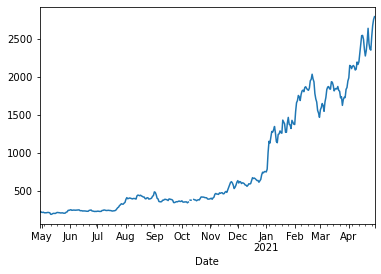

In [22]:
%matplotlib inline
highs.plot()

In [24]:
df.resample('W').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-03,210.571643,219.746152,206.782672,213.009582,213.009582,2.280659e+10
2020-05-10,209.455810,213.164729,201.401142,206.354983,206.354983,2.145038e+10
2020-05-17,194.564684,200.396733,191.539531,197.260886,197.260886,1.723019e+10
2020-05-24,208.729682,212.346926,203.468543,208.027206,208.027206,1.319095e+10
2020-05-31,214.430614,221.922745,210.856415,218.560335,218.560335,1.184949e+10
2020-06-07,240.949711,247.044625,236.096420,243.019584,243.019584,1.067425e+10
2020-06-14,241.694637,244.453620,236.448057,240.126532,240.126532,8.731830e+09
2020-06-21,231.337021,233.874132,227.127112,230.696699,230.696699,7.388079e+09
2020-06-28,233.836090,238.313642,228.727931,233.338185,233.338185,7.405910e+09


In [25]:
df.resample('W').agg({'Close': 'mean', 'High': 'max', 'Low': 'min', 'Volume': 'sum'})

,Close,High,Low,Volume
Date,,,,
2020-05-03,213.009582,227.529694,198.124512,1.140330e+11
2020-05-10,206.354983,216.327682,182.711166,1.501527e+11
2020-05-17,197.260886,209.160934,180.718338,1.206113e+11
2020-05-24,208.027206,215.908463,193.346436,9.233662e+10
2020-05-31,218.560335,244.045258,200.264282,8.294641e+10
2020-06-07,243.019584,252.222000,230.488052,7.471973e+10
2020-06-14,240.126532,249.888306,229.645065,6.112281e+10
2020-06-21,230.696699,236.394302,221.241760,5.171655e+10
2020-06-28,233.338185,248.508026,219.472672,5.184137e+10
